## import Library and Framework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

## read dataset

In [2]:
df = pd.read_csv('houses.csv')
df.head()

,bedroom,bathroom,area,price
0,2,3,1650,699000
1,4,2,1900,999000
2,4,2,1656,699000
3,1,1,608,625000
4,3,2,1674,849000


## Examine the data by plotting

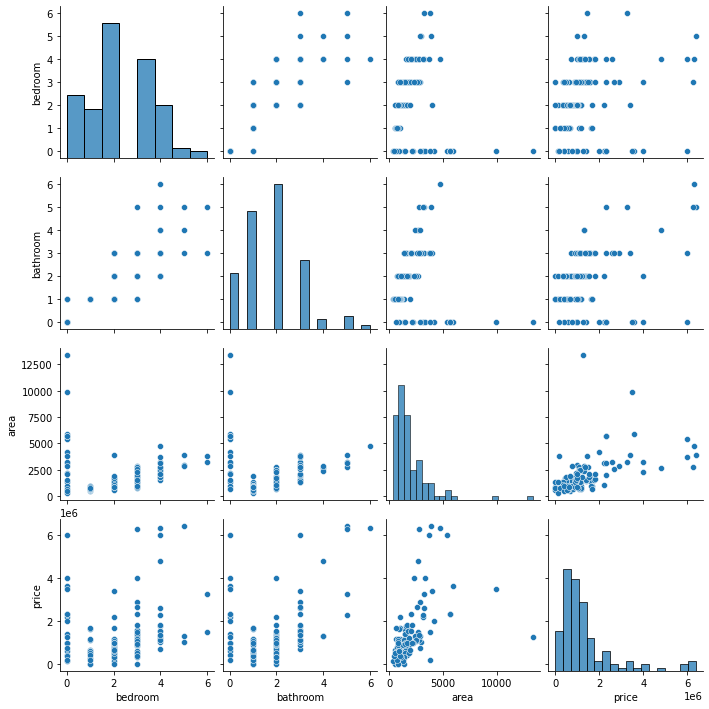

In [3]:
sns.pairplot(data=df)

#### check last row plotting 
(area - price) : nearly linear

## Train / Test Split - Create data Train and Test

In [115]:
msk = np.random.rand(len(df)) < 0.8
train = df[ msk]
test  = df[~msk]

print(f'dara size   :{df.size}\ncount train :{train.size} \ncount test  :{test.size}')

dara size   :504
count train :416 
count test  :88


## create x and y values

In [116]:
train_x = np.asanyarray(train[['area']])
train_y = np.asanyarray(train[['price']])

test_x = np.asanyarray(test[['area']])
test_y = np.asanyarray(test[['price']])


# plot train and test 

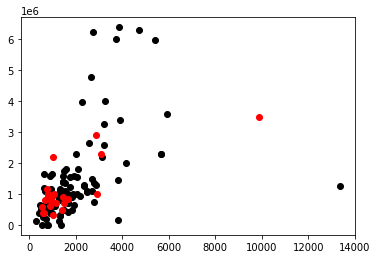

In [117]:
figure = plt.figure()
ax1 = figure.add_subplot(111)
ax1.scatter(train.area,train.price,color='black')
ax1.scatter(test.area,test.price,color='red')
plt.show()

### Find $\beta_0$ , $\beta_1$  in simple linear regression
$ \hat y $ defined as $\hat y =  \beta_0 +\beta_1 x_1 $

$x_1 := $ value area house


In [118]:
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)
beta_0 = reg.intercept_[0]
beta_1 = reg.coef_[0][0]
print(f"beta_0 vlaue is {beta_0} , beta_1 vlaue is {beta_1}")

beta_0 vlaue is 620853.9890359167 , beta_1 vlaue is 406.76224891101214


## plot line regression

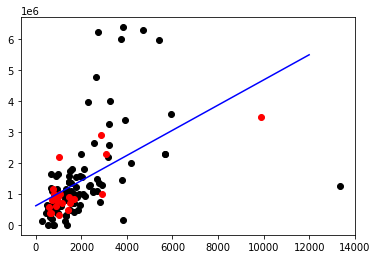

In [119]:
x = np.arange(0,12000)
x = x[:, np.newaxis]
y = reg.predict(x)
plt.plot(x,y,color='blue')
plt.scatter(train_x,train_y,color='black')
plt.scatter(test_x,test_y,color='red')
plt.show()

## calculate $R^2$ value 

In [120]:
test_y_hat = reg.predict(test_x)
r2 = r2_score(test_y,test_y_hat)
print(f'r2 : {r2}')

r2 : 0.5117449268904203


# none-linear regression 
Area seems to have a non-linear relationship with price

we find them

## import curve_fit

In [81]:
from scipy.optimize import curve_fit

## create function $\hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2^2$

In [103]:
def f(x,beta_0,beta_1,beta_2):
    return beta_0 + beta_1*x + beta_2*x**2

## create x and y values
convert x and y value in reange 0 to 1

In [121]:
train_x_convert = [float(i) for i in np.asanyarray(train_x/max(train_x))]
train_y_convert = [float(i) for i in np.asanyarray(train_y/max(train_y))]

In [122]:
popt , pocv = curve_fit(f, train_x_convert, train_y_convert)
print(f"beta_0 vlaue is {popt[0]} , beta_1 vlaue is {popt[1]} , beta_2 vlaue is {popt[2]}")

beta_0 vlaue is -0.061386589290509885 , beta_1 vlaue is 2.4987547244913086 , beta_2 vlaue is -2.2255398461101623


## plot line regression

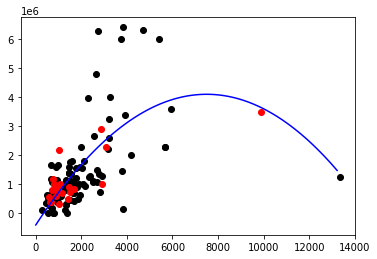

In [123]:
x = np.arange(0,1,0.01)[:, np.newaxis]
y = popt[0] + popt[1]*x + popt[2]*x**2
plt.plot(x*max(train_x),y*max(train_y),color='blue')
plt.scatter(train_x,train_y,color='black')
plt.scatter(test_x,test_y,color='red')
plt.show()

## calculate $R^2$ value 

In [107]:
test_x_convert = test_x/max(train_x)
test_y_hat = (popt[0] + popt[1]*test_x_convert + popt[2]*test_x_convert**2)*max(train_y)
r2 = r2_score(test_y,test_y_hat)
print(f'r2 : {r2}')

r2 : 0.6039916009860931


#### so in model none-linear regression better than linear regression 



## multi liner regression
#### 3 prametrs : area , count bedroom , count bathroom

## create x and y values

In [108]:
train_x = train[['area','bedroom','bathroom']]
train_y = train[['price']]

test_x = test[['area','bedroom','bathroom']]
test_y = test[['price']]

### Find $\beta_0$ , $\beta_1 , \beta_2 , \beta_3 $  in multiple linear regression
$ \hat y $ defined as $\hat y =  \beta_0 +\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 $

$x_1 := $ value area house

$x_2 := $ value count bedroom

$x_3 := $ value count bathroom

In [109]:
reg.fit(train_x,train_y)
beta = reg.coef_[0]
intercept = reg.intercept_[0]
print(f"beta_0 vlaue is {intercept} \nbeta_1 vlaue is {beta[0]} \nbeta_2 vlaue is {beta[1]} \nbeta_3 vlaue is {beta[2]}")

beta_0 vlaue is -40817.982200825354 
beta_1 vlaue is 352.4267137971377 
beta_2 vlaue is -270492.6220162497 
beta_3 vlaue is 731046.6296633529


## calculate $R^2$ value 

In [110]:
test_y_hat = reg.predict(test_x)
r2 = r2_score(test_y,test_y_hat)
print(f'r2 : {r2}')

r2 : 0.5827340717190416


## multi none-liner regression
#### 3 prametrs : area , count bedroom , count bathroom

### import PolynomialFeatures

In [90]:
from sklearn.preprocessing import PolynomialFeatures

## update dataframe 
#### add $(area)^2$ cloumn to df

In [111]:
train = df[ msk]
test  = df[~msk]


area_square = np.power(train[['area']],2)
train.insert(3,'area_square',area_square)

area_square = np.power(test[['area']],2)
test.insert(3,'area_square',area_square)

train.head()

,bedroom,bathroom,area,area_square,price
0,2,3,1650,2722500,699000
1,4,2,1900,3610000,999000
2,4,2,1656,2742336,699000
3,1,1,608,369664,625000
4,3,2,1674,2802276,849000


## create x and y values

In [112]:
train_x = train[['area','area_square','bedroom','bathroom']]
train_y = train[['price']]

test_x = test[['area','area_square','bedroom','bathroom']]
test_y = test[['price']]

### Find $\beta_0$ , $\beta_1 , \beta_2 , \beta_3 , \beta_4 $  in multiple linear regression
$ \hat y $ defined as $\hat y =  \beta_0 +\beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_2 + \beta_4 x_3 $

$x_1 := $ value area house

$x_2 := $ value count bedroom

$x_3 := $ value count bathroom

In [113]:
reg.fit(train_x,train_y)
beta = reg.coef_[0]
intercept = reg.intercept_[0]
print(f"beta_0 vlaue is {intercept} \nbeta_1 vlaue is {beta[0]} \nbeta_2 vlaue is {beta[1]} \nbeta_3 vlaue is {beta[2]}\nbeta_4 vlaue is {beta[3]}")

beta_0 vlaue is -557567.3329692027 
beta_1 vlaue is 1069.7185189890104 
beta_2 vlaue is -0.06816234294602527 
beta_3 vlaue is -349879.531563708
beta_4 vlaue is 619202.8580371204


## calculate $R^2$ value 

In [114]:
test_y_hat = reg.predict(test_x)
r2 = r2_score(test_y,test_y_hat)
print(f'r2 : {r2}')

r2 : 0.6556989687521244
